In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("florence.csv")

In [4]:
df.head()

,Seq,ID,Gender,M,Recency,F,FirstPruch,ChildBks,YouthBks,CookBks,DoltYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Rela_pruchace
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.drop(["Seq","ID"],axis=1,inplace=True)

In [6]:
df.head()

,Gender,M,Recency,F,FirstPruch,ChildBks,YouthBks,CookBks,DoltYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Rela_pruchace
0,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0
1,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0
2,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2
3,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0
4,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
sc = StandardScaler()

In [9]:
y = df["Florence"]
X = df.iloc[:,0:14]

In [10]:
X = sc.fit_transform(X)

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(14,)),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 1197 samples, validate on 300 samples
Epoch 1/100
1197/1197 [==============================] - 0s 68us/step - loss: 0.3172 - acc: 0.8997 - val_loss: 0.2926 - val_acc: 0.9167
Epoch 2/100
1197/1197 [==============================] - 0s 70us/step - loss: 0.3026 - acc: 0.9014 - val_loss: 0.2794 - val_acc: 0.9167
Epoch 3/100
1197/1197 [==============================] - 0s 81us/step - loss: 0.2910 - acc: 0.9064 - val_loss: 0.2673 - val_acc: 0.9233
Epoch 4/100
1197/1197 [==============================] - 0s 67us/step - loss: 0.2814 - acc: 0.9114 - val_loss: 0.2579 - val_acc: 0.9267
Epoch 5/100
1197/1197 [==============================] - 0s 70us/step - loss: 0.2737 - acc: 0.9131 - val_loss: 0.2500 - val_acc: 0.9300
Epoch 6/100
1197/1197 [==============================] - 0s 70us/step - loss: 0.2668 - acc: 0.9173 - val_loss: 0.2438 - val_acc: 0.9267
Epoch 7/100
1197/1197 [==============================] - 0s 72us/step - loss: 0.2622 - acc: 0.9173 - val_loss: 0.2385 - val_acc: 0.9267
E

In [29]:
pred = model.predict(X_test)

In [43]:
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score
import numpy as np

In [24]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 19us/step


[0.3103995490074158, 0.8999999992052714]

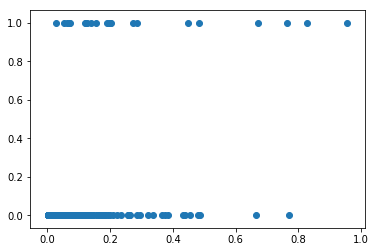

In [30]:
plt.scatter(pred,y_test)
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [36]:
y_score = [ p[0] for p in pred.tolist()]

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

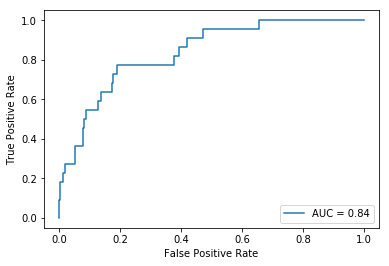

In [45]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=auc)
display.plot()  
plt.show() 